### Exploratory Data Analysis, Statistical Analysis, and Data Preprocessing

#### Feature Description
* CustomerId: Unique identifier for each customer.
* Surname: Customer's last name.
* CreditScore: Customer's credit score.
* Geography: Country of the customer.
* Gender: Gender of the customer.
* Age: Age of the customer.
* Tenure: Number of years the customer has been with the bank.
* Balance: Customer's account balance.
* NumOfProducts: Number of products the customer has with the bank.
* HasCrCard: Whether the customer has a credit card (1: Yes, 0: No).
* IsActiveMember: Whether the customer is an active member (1: Yes, 0: No).
* EstimatedSalary: Estimated customer salary.
* Exited: Whether the customer has churned (1: Yes, 0: No).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
# Load the data
churn_df = pd.read_csv('churn_modelling.csv')

In [3]:
# View the first 5 rows
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# View the last 5 rows
churn_df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Univariate Analysis

In [5]:
# 10,000 records and 14 features, with diverse data types. No null values.
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Summary statistics
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Customers' credit scores range from 350 to 850, with 650 as the average.
- Customers' ages range from 18 to 92 years, with a mean age of 38.92 +/- 10.49.
- Customer tenure ranges from 0 to 10 years. The median and average tenure is 5 years.
- Customer balance ranges from 0 to 250,898.09 euros, indicating a widespread (std of 62397.41).
- The number of products customers have range from 1 to 4.
- Customer salaries range from 11.58 to 199992.48 euros, suggesting high variability (std of 57510.49).
- Binary columns include HasCrCard, IsActiveMember, and Exited. 
- Exited is the response variable.

In [7]:
# Categorical data
churn_df.describe(include = 'O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


- 2932 unique last names, with Smith being the most prevalent.
- 3 distinct countries, with France having the most customers.
- 2 genders, with Males being the majority (5457 customers).

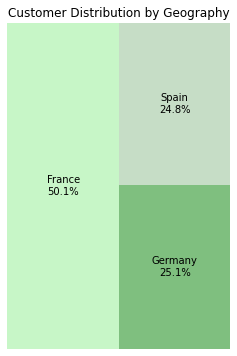

In [8]:
# Treemap - Customer Distribution by Geography
data = churn_df['Geography'].value_counts()
# Calculate percentages and round to one decimal
percentages = (data / data.sum() * 100).round(1)  
labels = [f'{index}\n{percent}%' for index, percent in zip(data.index, percentages)]

# Set the figure size for the plot
plt.figure(figsize=(4, 6))
# Colors for the treemap
colors = ['lightgreen', 'green', 'darkseagreen']
#Plot the tree map
squarify.plot(sizes=data.values, label=labels, alpha=0.5, color=colors)
# Set title
plt.title('Customer Distribution by Geography')
plt.axis('off')  # Remove the axis
plt.show() # Display the plot

- France accounts for the majority of customers, followed by Germany and Spain ranking second and third, respectively.

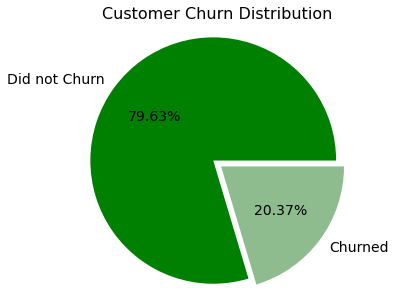

In [9]:
#Percentage of customer churn 
churn_counts = churn_df['Exited'].value_counts()
# Define the labels for the chart
labels = ['Did not Churn', 'Churned']
sizes = [churn_counts[0], churn_counts[1]]

# Set the figure size for the plot
plt.figure(figsize=(5,5)) 
# Plot the pie graph
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['green', 'darkseagreen'],explode=(0.04, 0.04),textprops={'fontsize': 14})
# Title of the graph
plt.title('Customer Churn Distribution', fontsize = 16)
plt.axis('equal')  
plt.show() # Show chart

 - The bank experienced a customer churn rate of 20.37%.

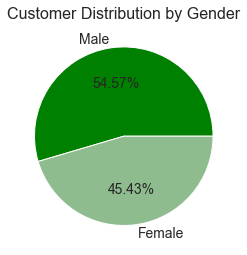

In [10]:
# Pie Graph - Gender Distribution

# Set the plot style to white
sns.set_style('whitegrid') 

# Count of each gender
data = churn_df['Gender'].value_counts()

#Labels for the pie chart
labels = ['Male', 'Female']

# Figure size
plt.figure(figsize=(4, 6)) 

# Plot the pie chart
plt.pie(data, autopct='%1.2f%%', colors=['green', 'darkseagreen'], labels=labels, textprops={'fontsize': 14}) 

# Set ttile for the plot
plt.title('Customer Distribution by Gender', fontsize=16) 
plt.show()  # Show chart

- The customer base is predominantly male, with males accounting for 54.57% of customers, while females account for 45.43%.

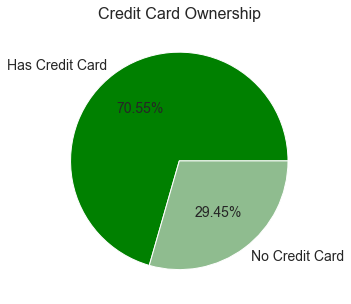

In [11]:
# Pie Graph - Credit Card Ownership

# Set the plot style to white
sns.set_style('whitegrid') 

# Count of has credit card
data= churn_df['HasCrCard'].value_counts()
# Labels for the pie chart
labels = ['Has Credit Card','No Credit Card']
# Figure size
plt.figure(figsize=(5,5)) 
# Plot the pie chart
plt.pie(data, autopct='%1.2f%%', colors=['green', 'darkseagreen'], labels = labels,textprops={'fontsize': 14} ) 
plt.title('Credit Card Ownership', fontsize=16)
plt.show() # Show chart

- Approximately 70.55% of customers own a credit card. 
- In contrast, 29.45% of customer do not own a credit card.

In [12]:
# Number of customers who churned vs. number of customers who did not churn
churned = churn_df[churn_df['Exited']== 1].count()[0]
not_churn = churn_df[churn_df['Exited']== 0].count()[0]
print(f'The number of customers who churned is {churned}. The number of customers who did not churn is {not_churn}.')

The number of customers who churned is 2037. The number of customers who did not churn is 7963.


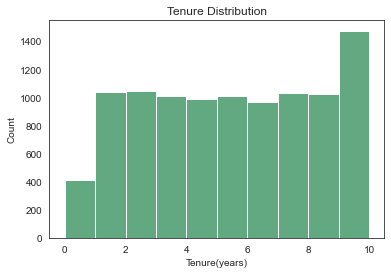

In [13]:
# Tenure distribution 

# Set the plot style to white
sns.set_style('white')

# Plot the historgram for Tenure
sns.histplot(churn_df['Tenure'], bins=10, color='seagreen')
# Title of the graph
plt.title('Tenure Distribution')
plt.xlabel('Tenure(years)') # # Label the x-axis
plt.ylabel('Count') # # Label the y-axis
plt.show() # Show the graph

- Customer tenure ranges from 0 to 10 years, with the majority at 10 years.
- Customers with 2-8 years of tenure have similar frequencies.

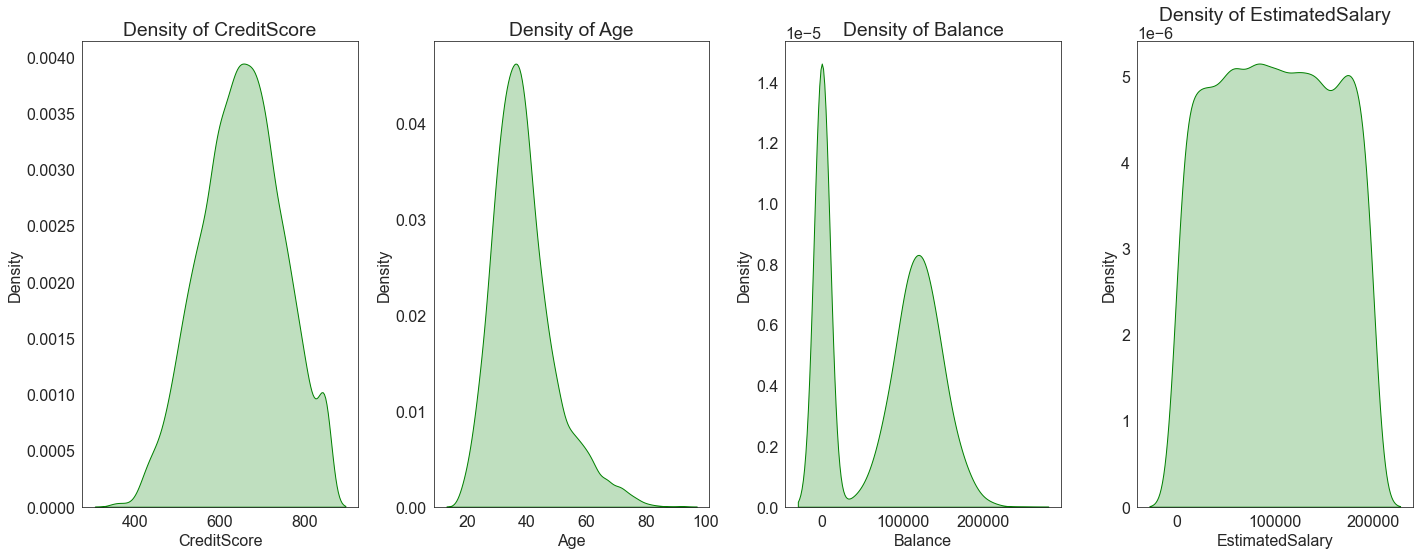

In [14]:
# Density plot for numerical features

# Set the plot style to white
sns.set_style('white')

# Numerical features for the density plot
num_features = churn_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]

# Update font size as needed
plt.rcParams.update({'font.size': 16})

# Create subplots with one row and multiple columns based on the number of numerical features
fig, axs = plt.subplots(nrows=1, ncols=len(num_features.columns), figsize=(20, 8))

# Loop through each numerical feature and plot its density
for i in range(len(num_features.columns)):
    sns.kdeplot(num_features[num_features.columns[i]], ax=axs[i], fill=True, color='green')
    axs[i].set_title(f'Density of {num_features.columns[i]}')
    
# Adjust layout
plt.tight_layout()

plt.show() # Show plots

In [15]:
# Review skewness of numerical features
churn_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

##### Credit Score Distribution
- The illustration of credit scores indicates that most customers credit scores between 600 and 700.
- Around 800+, there is a small group of customers with high credit scores.
- The skewness value, `-0.071607`, suggests the data is minimally skewed to the left, but overall, it is close to being normally distributed.

#####  Age Distribution
- The age distribution is right-skewed, with a skewness value of `1.011320`. 
- The majority of customers are between 20 and 50 years old.

##### Balance Distribution
- Bimodal distribution with two distinct peaks.


##### Estimated Salary Distribution
- The plot shows that salaries are relatively evenly distributed. 
- The distribution of salaries is slightly positive skew, with a skewness value of `0.002085`, and there is a minimal presence of extreme outliers.

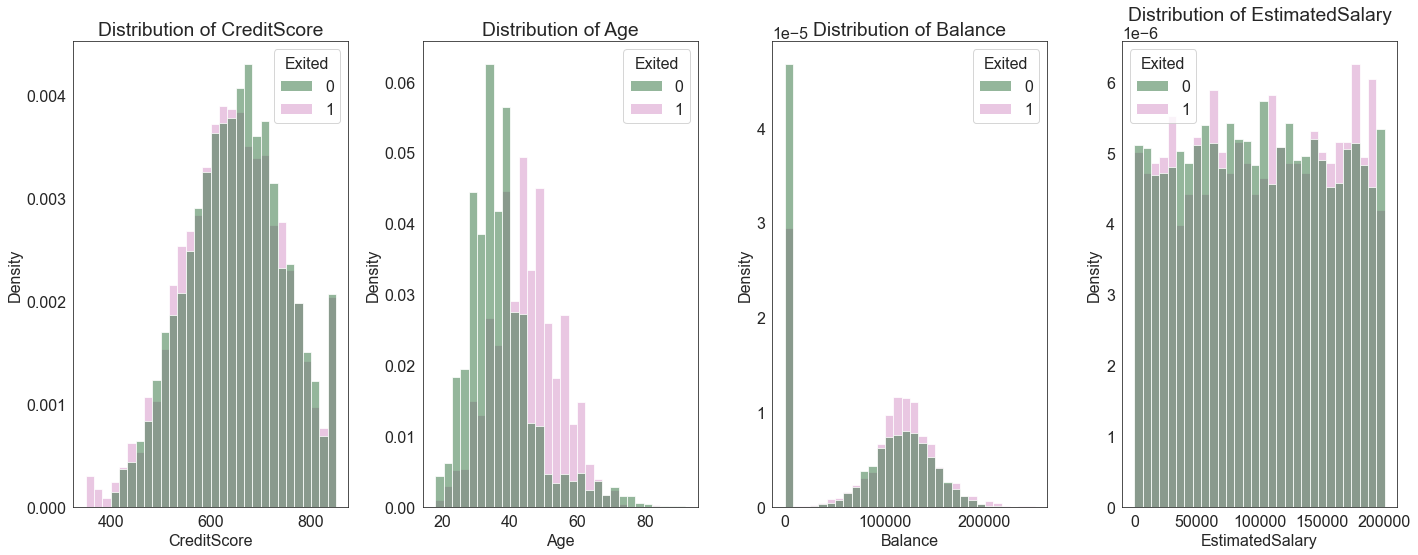

In [16]:
# Historgam of numerical features.

# Select numerical features for the histogram plot, excluding the 'Exited' column
num_features = churn_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']]

# Create subplots with one row and multiple columns based on the number of numerical features
fig, axs = plt.subplots(nrows=1, ncols=len(num_features.columns)-1, figsize=(20, 8))

# Loop through each numerical feature (excluding 'Exited') and plot its histogram
for i in range(len(num_features.columns)-1):
    sns.histplot(data=num_features, x=num_features.columns[i], ax=axs[i], hue='Exited',stat='density',
                 common_norm=False, bins=30, palette='cubehelix') # Plot histogram with density, color by 'Exited'
    axs[i].set_title(f'Distribution of {num_features.columns[i]}') # Title of each subplot

plt.tight_layout()# Adjust layout
plt.show() # Show plots

- Credit scores range from 350 to 850, and customers who churned tend to have lower credit scores, with a peak occurring at approximately 633. 
- Most customers churn at age 45 and older. 
- The estimated salary is mostly evenly distributed across both groups.  

## Bivariate Analysis

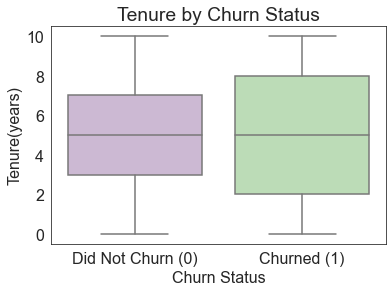

In [17]:
# Set the style of the plot to white
sns.set_style('white')

# Create a boxplot to visualize the distribution of 'Tenure' for each 'Exited' category (Churned vs. Did Not Churn)
sns.boxplot(x='Exited', y='Tenure', data=churn_df, palette='PRGn') 

# Set the title of the plot
plt.title('Tenure by Churn Status')

# Label the x-axis
plt.xlabel('Churn Status')

# Tick labels to represent churn status meaning
plt.xticks([0, 1], ['Did Not Churn (0)', 'Churned (1)'])

# Label the y-axis
plt.ylabel('Tenure(years)')
plt.show() # Display the plot

- The tenure for customers who either stayed or left the bank ranges from 0 to 10 years. 
- Both groups have a median tenure of 5 years.

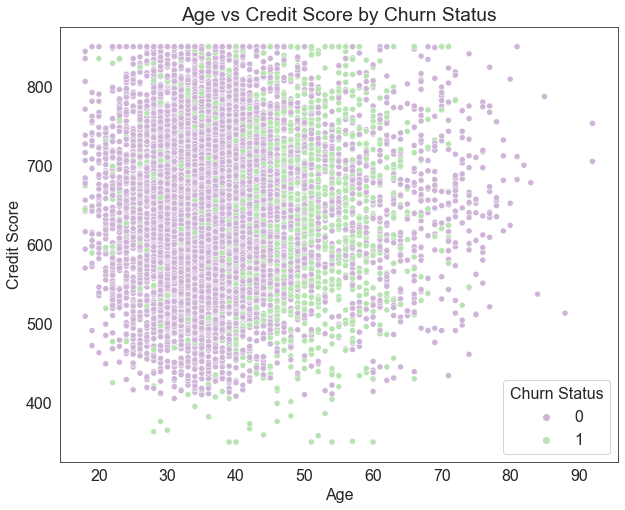

In [18]:
# Scatter Plot- Age and Credit Score by Churn status

# Set the figure size
plt.figure(figsize = (10, 8))
# Plot scatter plot to show relationship between 'Age' and 'CreditScore' with 'Exited' as hue
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=churn_df, palette = 'PRGn')
# Set the title for the plot
plt.title('Age vs Credit Score by Churn Status')
plt.xlabel('Age') # Label the x-axis
plt.ylabel('Credit Score') # Label the y-axis
plt.legend(title='Churn Status') # Add a legend with a title for Churn Status
plt.show() # Show plot

- The credit scores for customers who stayed or churned range from 350 to 850.
- Most customers have credit scores around 600 to 800, with a few outliers above 800.
- The illustration reveals no clear relationship between age, credit score, and customer churn.

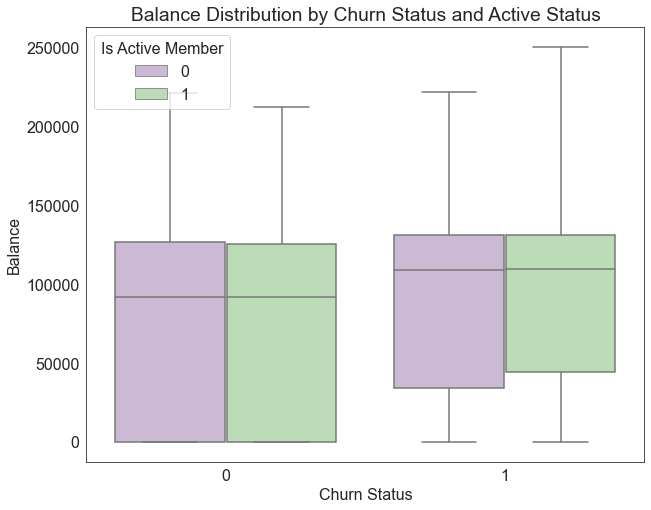

In [19]:
# Box Plot - Balance Distribution, Exit Status, and Membership Status

# Set the figure size
plt.figure(figsize=(10,8))

# Plot boxplot to visualize Balance distribution by Exited status and IsActiveMember status
sns.boxplot(x='Exited', y='Balance', hue='IsActiveMember', data=churn_df, palette = 'PRGn')

# Set the title for the plot
plt.title('Balance Distribution by Churn Status and Active Status') # Set title
plt.xlabel('Churn Status') # Label the x-axis
plt.ylabel('Balance')# Label the y-axis
plt.legend(title='Is Active Member', loc='upper left') # Add a legend
plt.show() # Show plot

- Active and inactive customers have similar balance distribution regardless of churn status.
- The balance distribution does not show a significant difference between customers who churned and those who did not.

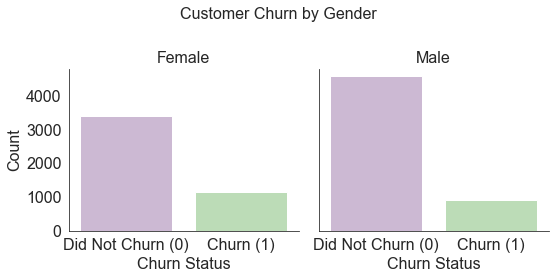

In [20]:
# Faceted Count Plot- customer exited status by gender.

# Set the plot style to white
sns.set_style('white')

# FacetGrid to display count plots for Exited by Gender, with separate plots for each gender
g = sns.FacetGrid(churn_df, col='Gender', hue='Exited', height=4, aspect=1, palette='PRGn')
# Map the count plot to visualize Exited distribution, with 0 as Did Not Churn and 1 as Churned
g.map(sns.countplot, 'Exited', order=[0, 1])

# Set titles, labels, and axis ticks
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Churn Status', 'Count')
g.set_xticklabels(['Did Not Churn (0)', 'Churn (1)'])
g.fig.suptitle('Customer Churn by Gender', fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjust the title position to avoid overlap
plt.tight_layout()  # Ensure tight layout 
plt.show() 

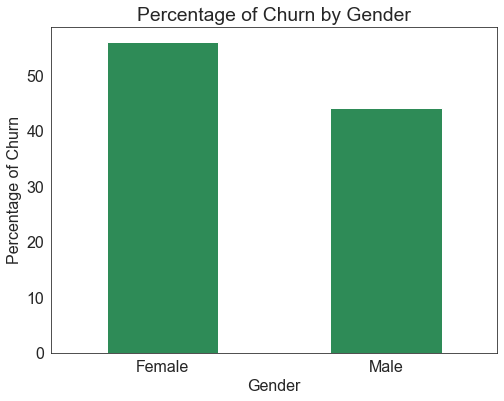

In [21]:
# Percentage of churned customers by gender

# Include only redsors where 'Exited' is 1(churn)
exited_data = churn_df[churn_df['Exited'] == 1]  
gender_exit_count = exited_data['Gender'].value_counts(normalize=True) * 100  # Calculate percentages

# Plot a bar chart 
plt.figure(figsize=(8, 6))
gender_exit_count.plot(kind='bar', color='seagreen') # Create a bar plot
plt.title('Percentage of Churn by Gender') # Set the title
plt.xlabel('Gender') # Label the x-axis
plt.ylabel('Percentage of Churn') #Label the y-axis
plt.xticks(rotation=0)  
plt.show()

In [22]:
exited_data = churn_df[churn_df['Exited'] == 1]  # Filter for Exited == 1
gender_exit = exited_data['Gender'].value_counts(normalize=True) * 100  # Calculate percentages
gender_exit # Return values

Female    55.915562
Male      44.084438
Name: Gender, dtype: float64

- On average, male customers have lower churn rates compared to female customers.

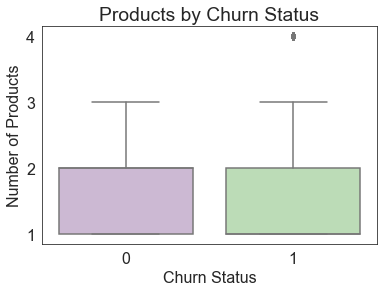

In [23]:
# Number of Products and Exit Status

# Set the plot style to white
sns.set_style('white')
# Create boxplot to visualize the distribution of 'NumOfProducts' by Exited status
sns.boxplot(x='Exited', y='NumOfProducts', data=churn_df, palette='PRGn')
plt.title('Products by Churn Status') # Set the title
plt.xlabel('Churn Status') # Label the x-axis
plt.ylabel('Number of Products') # Label the y-axis
plt.show()

- The median number of products across both groups is 1.
- In the churned group, there are outliers, customers with four products.

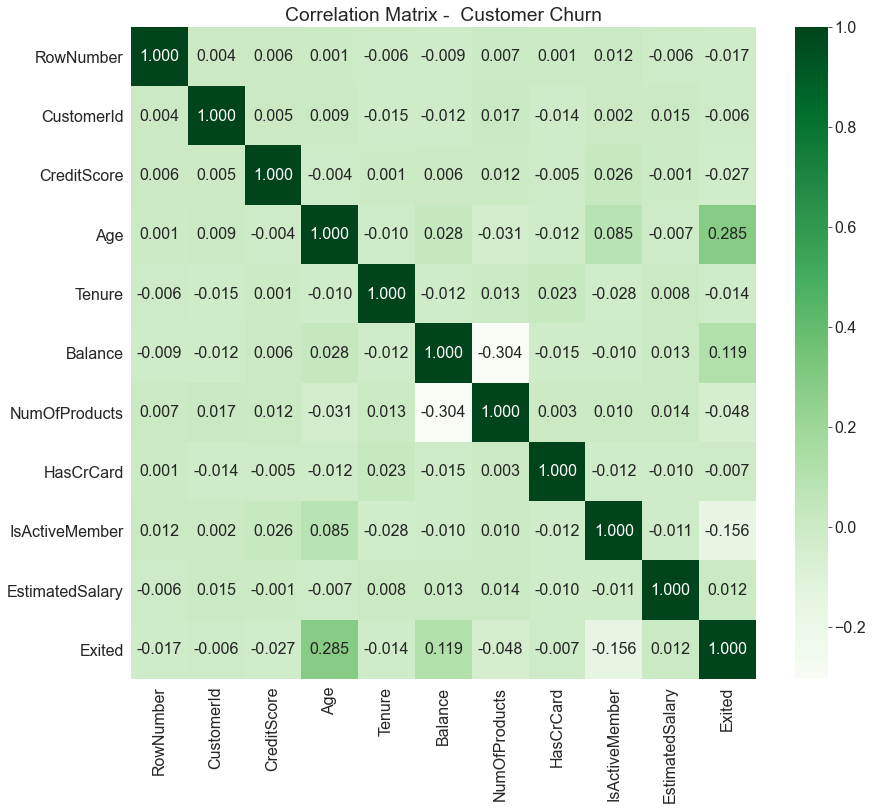

In [24]:
# Correlation matrix for the numerical columns
corr = churn_df.corr()
plt.figure(figsize = (14,12)) # Figure size for the heatmap

# Create heatmap to visualize the correlation matrix
sns.heatmap(corr, annot = True, cmap='Greens', fmt='.3f')
plt.title('Correlation Matrix -  Customer Churn') 
plt.show()

- There is a weak positive correlation (0.29) between age and customer churn.
- The correlation heatmap shows that customer churn does not strongly correlate with any other feature.

#### Statistical Analysis

In [25]:
## Import necessary statistical functions from scipy
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

##### Chi-squared 
- Can be used to check if two categorical features are related or if they occur independently of each other. 

In [26]:
# Is there a relationship between owning a credit card and customer churn?

# Chi-Square Test to assess the relationship between Exited and HasCrCard
contingency_table = pd.crosstab(churn_df['Exited'], churn_df['HasCrCard'])
chi2, p, dof, expected = chi2_contingency(contingency_table) 
print('Chi-Square Test:')
# Print the p-value to assess statistical significance
print(f"p-value: {p}")

Chi-Square Test:
p-value: 0.49237236141554686


- P-value of 0.4923(49.23%) indicates that there is no significant association/relationship between `Exited` and `HasCrCard`.
- Owning a credit card does not significantly influence a customer's likelihood to remain with or leave the bank.

In [27]:
# Among customers with a credit card, is there a significant relationship between having a credit card and exited.

# Subset data for customers who have a credit card and those who do not
has_cr_card = churn_df[churn_df['HasCrCard'] == 1]
no_cr_card = churn_df[churn_df['HasCrCard'] == 0]

# Chi-Square Test for customers with a credit card
contingency_tbl_has_cr_card = pd.crosstab(has_cr_card['Exited'], has_cr_card['HasCrCard'])
chi2, p, dof, expected = chi2_contingency(contingency_tbl_has_cr_card)

print("Chi-Square Test for Has_CR_Card:")
# Print the p-value for this subset
print(f"p-value: {p}")

# Chi-Square Test for customers without a credit card
contingency_tbl_no_cr_card = pd.crosstab(no_cr_card['Exited'], no_cr_card['HasCrCard'])
chi2, p, dof, expected = chi2_contingency(contingency_tbl_no_cr_card)

print("Chi-Square Test for No_Cr_Card:")
# Print the p-value for this subset
print(f"p-value: {p}")

Chi-Square Test for Has_CR_Card:
p-value: 1.0
Chi-Square Test for No_Cr_Card:
p-value: 1.0


- A p-value of 1 indicates no significant relationship between customer churn and owning or not owning a credit card.

In [28]:
# Is there a relationship between gender and customer churn?

# Perform a Chi-Square Test to check the relationship between Exited and Gender
contingency_tbl = pd.crosstab(churn_df['Exited'], churn_df['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency_tbl)

print("Chi-Square Test:")
# Print the p-value
print(f"p-value: {p}")

Chi-Square Test:
p-value: 2.2482100097131755e-26


- P-value of  2.25e-26 suggest that there is a significant relationship between `Exited` and `Gender`.
- Gender has a significant influence whether customers churn.

In [29]:
# Subset data for male and female customers
male = churn_df[churn_df['Gender'] == 'Male']
female = churn_df[churn_df['Gender'] == 'Female']

# Chi-Square Test for male customers
contingency_tbl_male = pd.crosstab(male['Exited'], male['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency_tbl_male)

print("Chi-Square Test for Male:")
# Print the p-value for male customers
print(f"p-value: {p}")

# Perform Chi-Square Test for female customers
contingency_tbl_female = pd.crosstab(female['Exited'], female['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency_tbl_female)

print("Chi-Square Test for Female:")
# Print the p-value for female customers
print(f"p-value: {p}")


Chi-Square Test for Male:
p-value: 1.0
Chi-Square Test for Female:
p-value: 1.0


- A p-value of 1 indicates no significant relationship between customer churn and the gender male or customer churn and the gender female.

#### T-Test
-  A T-Test compares the means of two groups to see if they are significantly different from each other.

In [30]:
# Credit Score - churn v. not churned
churned_credit = churn_df[churn_df['Exited'] == 1]['CreditScore'] # Extract CreditScore for churned customers
not_churned_credit = churn_df[churn_df['Exited'] == 0]['CreditScore'] # Extract CreditScore for customers who did not churn

# Independent two-sample t-test to check if the mean credit scores for churned vs. not churned are significantly different
t_credit, p_credit = stats.ttest_ind(churned_credit, not_churned_credit, equal_var=False)
print('T-Test for Credit Score')
#print(f'T-Statistic: {t_credit}')
print(f'p-value: {p_credit}') #Print the p-value 

# Age- churned v. not churned
churned_age = churn_df[churn_df['Exited'] == 1]['Age']
not_churned_age = churn_df[churn_df['Exited'] == 0]['Age']

#Independent two-sample t-test to check if the mean age for churned vs not churned is significantly different
t_age, p_age = stats.ttest_ind(churned_age, not_churned_age, equal_var=False)
print('\nT-Test for Age')
#print(f'T-Statistic: {t_age}')
print(f'p-value: {p_age}') #Print the p-value

T-Test for Credit Score
p-value: 0.008464728991832862

T-Test for Age
p-value: 4.7127272656641046e-179


##### Credit Score
- A P-value of 0.0.008 suggests a significant difference in the average credit score between customers who churned and customers who did not churn.

##### Age 
- A P-value of 4.71e-179 suggests that there is a significant difference in the average age between customers who churned and customers who did not churn.
- This implies that age is a strong factor in customer churn.

## Data Preprocessing

In [31]:
# Check for duplicates
churn_df.duplicated().sum()

0

No duplicates found in the data

In [32]:
# Import OneHotEncoder and StandardScalar
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [33]:
# Drop irrelevant features 
churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [34]:
# Update data types

# Geography, Gender: categorical
churn_df['Geography'] = churn_df['Geography'].astype('category')
churn_df['Gender'] = churn_df['Gender'].astype('category')

# Tenure, NumOfProducts: int
churn_df['Tenure'] = churn_df['Tenure'].astype('uint8')
churn_df['NumOfProducts'] = churn_df['NumOfProducts'].astype('uint8')

# Balance, EstimatedSalary: float
churn_df['Balance'] = churn_df['Balance'].astype('float32')
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].astype('float32')

# Verify updated data types
print(churn_df.dtypes)

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                uint8
Balance             float32
NumOfProducts         uint8
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float32
Exited                int64
dtype: object


In [35]:
# Check number of records with zero balance
churn_df[churn_df['Balance']==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.882812,1
3,699,France,Female,39,1,0.0,2,0,0,93826.632812,0
6,822,France,Male,50,7,0.0,2,1,1,10062.799805,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.007812,0
12,476,France,Female,34,10,0.0,2,1,0,26260.980469,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.593750,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.406250,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.546875,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.640625,0


In [36]:
# Drop records where the balance equals 0 to address the bimodal distribution
churn_df = churn_df[churn_df['Balance'] != 0].reset_index(drop=True)
churn_df.sort_values(by = 'Balance') # confirm that zero balances were dropped
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0
1,502,France,Female,42,8,159660.796875,3,1,0,113931.570312,1
2,850,Spain,Female,43,2,125510.820312,1,1,1,79084.101562,0
3,645,Spain,Male,44,8,113755.781250,2,1,0,149756.703125,1
4,376,Germany,Female,29,4,115046.742188,4,1,0,119346.882812,1


In [37]:
# One-Hot Encoding for categorical data. drop_first = True to avoid multicolinearity  
df_encoded = pd.get_dummies(churn_df, columns=['Geography', 'Gender'], drop_first=True)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,608,41,1,83807.859375,1,0,1,112542.578125,0,0,1,0
1,502,42,8,159660.796875,3,1,0,113931.570312,1,0,0,0
2,850,43,2,125510.820312,1,1,1,79084.101562,0,0,1,0
3,645,44,8,113755.781250,2,1,0,149756.703125,1,0,1,1
4,376,29,4,115046.742188,4,1,0,119346.882812,1,1,0,0


In [38]:
# List of numerical columns to scale
numerical_cols = ['CreditScore', 'Age', 'Tenure','Balance', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical data
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the scaled data
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.445062,0.172050,-1.367907,-1.196956,1,0,1,0.206101,0,0,1,0
1,-1.538668,0.267512,1.038181,1.323687,3,1,0,0.230310,1,0,0,0
2,2.051662,0.362973,-1.024180,0.188861,1,1,1,-0.377045,0,0,1,0
3,-0.063331,0.458435,1.038181,-0.201767,2,1,0,0.854704,1,0,1,1
4,-2.838615,-0.973493,-0.336726,-0.158867,4,1,0,0.324693,1,1,0,0


In [39]:
# Review scaled values
print(df_encoded[numerical_cols].mean())
print(df_encoded[numerical_cols].std())

CreditScore       -2.881397e-16
Age                2.687634e-16
Tenure             2.104606e-17
Balance           -5.124976e-17
EstimatedSalary    2.341156e-17
dtype: float64
CreditScore        1.000078
Age                1.000078
Tenure             1.000078
Balance            1.000078
EstimatedSalary    1.000078
dtype: float64


In [40]:
# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# # Assess for multicollinearity 
np.random.seed(33)# For reproducibility

# Select encoded features
encoded_features = df_encoded

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = encoded_features.columns
vif_data['VIF'] = [variance_inflation_factor(encoded_features.values, i) for i in range(len(encoded_features.columns))]

print(vif_data)

              Feature       VIF
0         CreditScore  1.002075
1                 Age  1.111979
2              Tenure  1.003276
3             Balance  1.001728
4       NumOfProducts  4.187671
5           HasCrCard  2.731605
6      IsActiveMember  1.943247
7     EstimatedSalary  1.001068
8              Exited  1.508672
9   Geography_Germany  2.008983
10    Geography_Spain  1.408451
11        Gender_Male  1.991092


- VIF < 5: The variable has low multicollinearity.
- VIF between 5 and 10: The variable has moderate multicollinearity.
- VIF > 10: The variable has high multicollinearity.

https://medium.com/@satyarepala/tackling-multicollinearity-understanding-variance-inflation-factor-vif-and-mitigation-techniques-2521ebf024b6